In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing the dataset
dataset=pd.read_csv('heart-disease.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [3]:
#splitting the dataset into training and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [6]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [7]:
#training the model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [10]:
#predicting a new result
print(classifier.predict(sc.transform([[58,0,3,150,283,1,0,162,0,1,2,0,2]])))

[1]


In [12]:
#predicting test set results
y_pred=classifier.predict(X_test)
y_pred=y_pred.reshape(len(y_pred),1)
y_test=y_test.reshape(len(y_test),1)
print(np.concatenate((y_pred,y_test),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


In [14]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[21  3]
 [ 6 31]]


0.8524590163934426

C:\Users\Sreekumar\AppData\Local\Temp\ipykernel_2528\4141772336.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


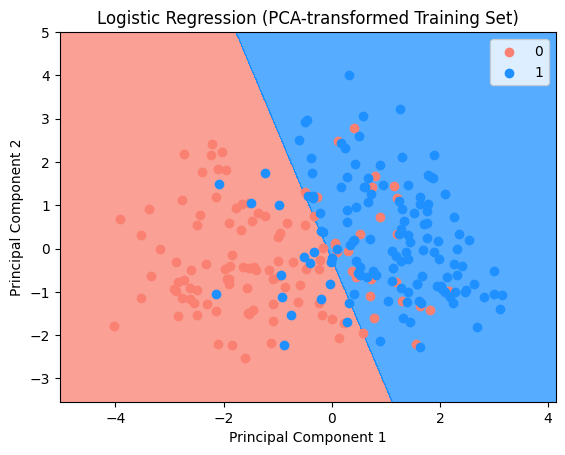

In [18]:
#visualizing training set results
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap


# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Visualize the PCA-transformed data
X1, X2 = X_train_pca[:, 0], X_train_pca[:, 1]
X_set, y_set = X_train_pca, y_train

# Create a meshgrid for the 2 principal components
X1_grid, X2_grid = np.meshgrid(np.arange(start=X1.min() - 1, stop=X1.max() + 1, step=0.01),
                               np.arange(start=X2.min() - 1, stop=X2.max() + 1, step=0.01))

# Plot the decision boundary
plt.contourf(X1_grid, X2_grid, classifier.predict(pca.inverse_transform(np.array([X1_grid.ravel(), X2_grid.ravel()]).T)).reshape(X1_grid.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))

# Plot the data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)

plt.title('Logistic Regression (PCA-transformed Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
#PCA: The PCA(n_components=2) reduces the 13-dimensional feature space to 2 principal components.
#pca.fit_transform(X_train): This line applies PCA on the training data and transforms it to 2D.
#pca.inverse_transform: This is used to project the 2D points back to the original feature space for the classifier to make predictions.



